<a href="https://colab.research.google.com/github/cdl-hanyang/cdl2022-s-ml/blob/main/week2_1_linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np

N = 10

f = lambda x: np.sin(2*np.pi*x)
sigma = 0.1

np.random.seed(42)
x_train = np.random.rand(N)
y_train = f(x_train) + sigma*np.random.randn(N)

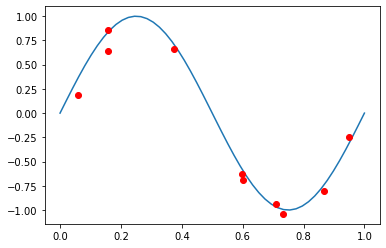

In [29]:
import matplotlib.pyplot as plt

xspan = np.linspace(0, 1)
plt.plot(xspan, f(xspan))
plt.scatter(x_train, y_train, color='r', zorder=3)
plt.show()

**Polynomial basis**
$$
\phi_0(x) = 1, \phi_1(x) = x, \phi_2(x) = x^2
$$

**Gaussian basis**
$$
\phi_0(x) = 1, \phi_1(x) = \exp\left(-\frac{(x - 0.5)^2}{2s^2}\right), \cdots
$$

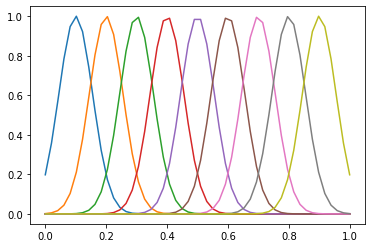

In [30]:
M = 9
s = 0.5/M
GB = lambda mu, x: np.exp(-(x - mu)**2/(2*s**2))

mus = np.linspace(0, 1, M + 2)[1:-1]
for mui in mus:
    plt.plot(xspan, GB(mui, xspan))
plt.show()

**Design matrix**
$$
\boldsymbol\Phi = \left(\begin{matrix}\phi_0(x_1) & \phi_1(x_1) & \cdots & \phi_M(x_1) \\ \phi_0(x_2) & \phi_1(x_2) & \cdots & \phi_M(x_2) \\ \vdots & \vdots & \ddots & \vdots \\ \phi_0(x_N) & \phi_1(x_N) & \cdots & \phi_M(x_N)\end{matrix}\right)
$$

$$
(\boldsymbol\Phi)_{ij} = \phi_j(x_i)
$$

**Total loss function value**
$$
\mathcal{L} = \sum_{i = 1}^N L_\text{SE}(\mathbf x_i, y_i; \mathbf w) = \frac 1 2 (\boldsymbol\Phi\mathbf w - \mathbf y)^\mathsf T(\boldsymbol\Phi\mathbf w - \mathbf y)
$$

In [31]:
PHI = np.stack([np.ones(N)] + [GB(mui, x_train) for mui in mus], axis=1)
wopt = np.linalg.solve(PHI.T.dot(PHI), PHI.T.dot(y_train))
print(wopt)

[-1.38172450e+00  2.21057607e+01 -4.10024915e+02  8.30371894e+03
 -3.74947065e+03  6.44202980e+01 -6.64660448e+00  1.88685626e+00
 -1.88367106e+00  1.78792180e+00]


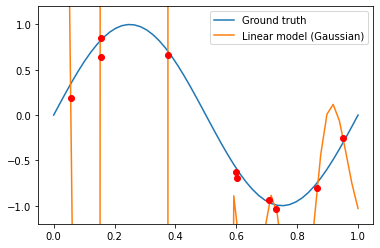

In [33]:
fhat = lambda x: np.stack([np.ones(len(x))] + [GB(mui, x) for mui in mus], axis=1).dot(wopt)

plt.plot(xspan, f(xspan), label='Ground truth')
plt.plot(xspan, fhat(xspan), label='Linear model (Gaussian)')
plt.legend()
plt.scatter(x_train, y_train, color='r', zorder=3)
plt.ylim(-1.2, 1.2)
plt.show()